In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [2]:
# arr = np.array([[.65, .185, .1, .1],
#        [.26, .109, .039, .06],
#        [.925, .3, .077, .169]])
arr = np.array([[.36, .72, .92, .83],
       [.79, .51, .5, .57],
       [.69, .46, .14, .32]])
arr = arr.T
df = pd.DataFrame(arr, columns=["H", "j", "c"], index=["E1", "E2", "E3", "E4"])
df

,H,j,c
E1,0.36,0.79,0.69
E2,0.72,0.51,0.46
E3,0.92,0.50,0.14
E4,0.83,0.57,0.32


In [3]:
# Descripción del dataframe
df.describe()

,H,j,c
count,4.000000,4.000000,4.000000
mean,0.707500,0.592500,0.402500
std,0.245679,0.135247,0.232146
min,0.360000,0.500000,0.140000
25%,0.630000,0.507500,0.275000
50%,0.775000,0.540000,0.390000
75%,0.852500,0.625000,0.517500
max,0.920000,0.790000,0.690000


In [4]:
# Nivel de Correlación entre las columnas del dataframe
df.corr()

,H,j,c
H,1.000000,-0.923688,-0.964785
j,-0.923688,1.000000,0.829964
c,-0.964785,0.829964,1.000000


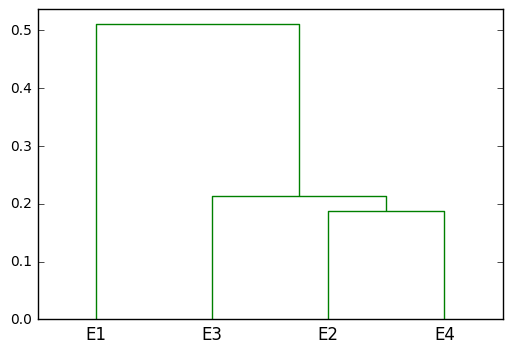

In [5]:
def augmented_dendrogram(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)

#     if not kwargs.get('no_plot', False):
#         for i, d in zip(ddata['icoord'], ddata['dcoord']):
#             x = 0.5 * sum(i[1:3])
#             y = d[1]
#             plt.plot(x, y, 'ro')
#             plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
#                          textcoords='offset points',
#                          va='top', ha='center')

    return ddata

linkage_matrix = linkage(arr, "single")

plt.figure()#1, 2, 1)

# ddata = augmented_dendrogram(linkage_matrix,
ddata = dendrogram(linkage_matrix,
                             labels=["E1", "E2", "E3", "E4"],
                             color_threshold=1,
                             p=6,
                             truncate_mode=None
            #                truncate_mode='lastp'
                           )
# plt.title("Dendograma")

plt.show()

## Distancias

In [6]:
dist_df = pd.DataFrame(columns=df.index)
for i, a in enumerate(arr):
    dist = [np.linalg.norm(a-x) for x in arr]
    dist_df.loc[i] = dist
#     print(a, dist)
dist_df.index = df.index
dist_df

,E1,E2,E3,E4
E1,0.000000,0.510784,0.836780,0.637338
E2,0.510784,0.000000,0.377492,0.187883
E3,0.836780,0.377492,0.000000,0.213073
E4,0.637338,0.187883,0.213073,0.000000


### Por si necesitas las distancias despues de unidas las estaciones... (>_<)

In [7]:
distancias_combinadas = linkage(df, "single")
ac_cols = [x for x in range(len(dist_df.columns))]
for c1, c2, dis, x in distancias_combinadas:
    n = len(ac_cols)+1
    print("Dist: E{}-E{} = {} (hereinafter, E{})".format(int(c1+1), int(c2+1), dis, n))
    ac_cols.append(n)

Dist: E2-E4 = 0.18788294228055935 (hereinafter, E5)
Dist: E3-E5 = 0.2130727575266252 (hereinafter, E6)
Dist: E1-E6 = 0.5107837115648853 (hereinafter, E7)
